In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import datetime as dt

import folium as fl
import json

from sklearn.cluster import KMeans


import warnings

In [2]:
#read data frame
df= pd.read_csv("train.csv")
df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [4]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [5]:
df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [6]:
df.corr()

,X,Y
X,1.000000,0.559338
Y,0.559338,1.000000


H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

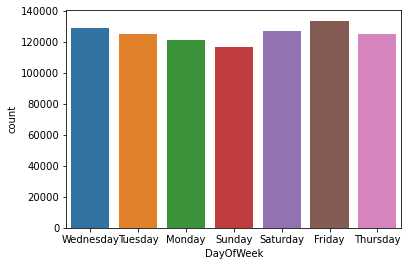

In [7]:
sns.countplot(df.DayOfWeek)

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PdDistrict', ylabel='count'>

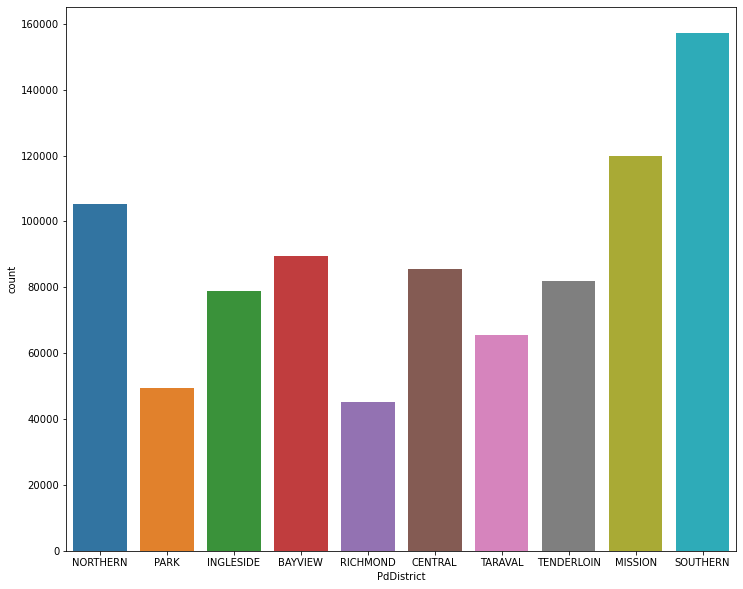

In [8]:
plt.figure(figsize=(12,10))
sns.countplot(df["PdDistrict"])


([<matplotlib.patches.Wedge at 0x16739fded60>,
 [Text(0.9305842492012989, 0.5865261760044944, 'SOUTHERN'),
  Text(0.01870357597836558, 1.0998409777079692, 'MISSION'),
  Text(-0.7804269893530169, 0.775199144923023, 'NORTHERN'),
  Text(-1.0959987826647386, 0.09373723058321695, 'BAYVIEW'),
  Text(-0.9432376386560433, -0.5659529636132068, 'CENTRAL'),
  Text(-0.46044975026042073, -0.9989925062207006, 'TENDERLOIN'),
  Text(0.15667173879384122, -1.0887855464981682, 'INGLESIDE'),
  Text(0.6741797972067941, -0.8691844459251478, 'TARAVAL'),
  Text(0.9653688480995053, -0.5273167806158217, 'PARK'),
  Text(1.0856408993571653, -0.1771548408679973, 'RICHMOND')])

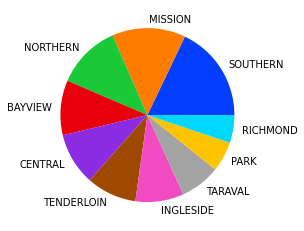

In [9]:
colors = sns.color_palette('bright')
dist= df["PdDistrict"].value_counts()
#explode = [0.2,0.2, 0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2, 0.2,0.2]
plt.pie(dist, labels= dist.index, colors= colors) #explode =explode )


<AxesSubplot:>

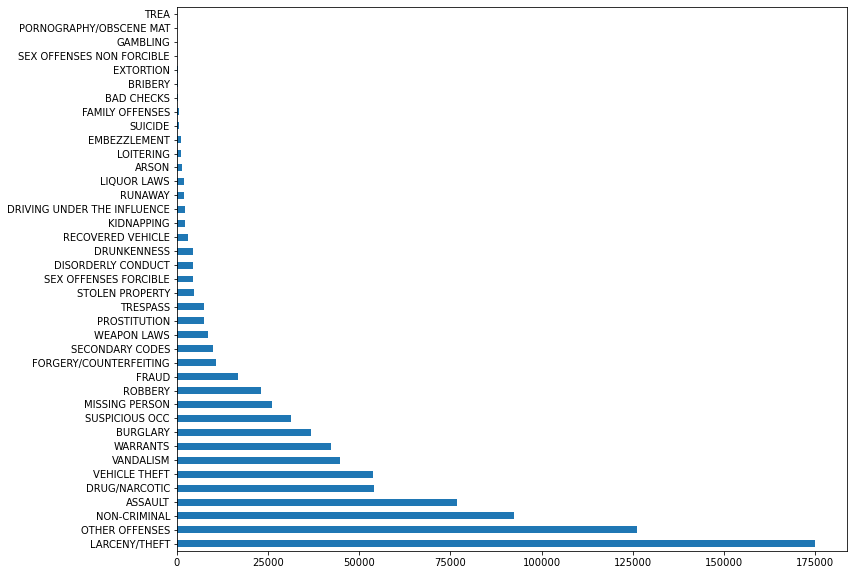

In [10]:
#distribution of crime according to catgories
plt.figure(figsize=(12,10))
categories_plot=df["Category"].value_counts()
categories_plot.plot(kind= "barh")

In [11]:
df["Dates"] = pd.to_datetime(df["Dates"])

In [12]:
df["Month"] = pd.DatetimeIndex(df["Dates"]).month
df["Year"] = pd.DatetimeIndex(df["Dates"]).year
df["Day"] = pd.DatetimeIndex(df["Dates"]).day
df["Hour"] = pd.DatetimeIndex(df["Dates"]).hour
df["Minute"] = (df["Dates"]).dt.minute
df.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Month,Year,Day,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,2015,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,2015,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,2015,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5,2015,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5,2015,13,23,30


<AxesSubplot:>

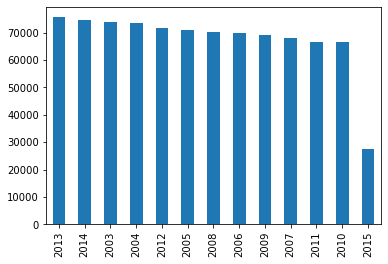

In [13]:
df["Year"].value_counts().plot(kind="bar")

In [14]:
#2015 is incomplete, hence remove it

df_1 = df.query("Year<=2014")
df_1["Year"].unique()

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003], dtype=int64)

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

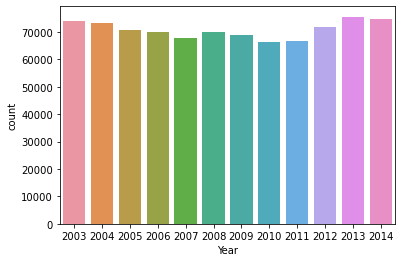

In [15]:
sns.countplot(df_1["Year"])

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='count'>

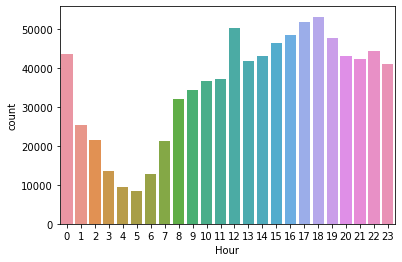

In [16]:
#visualize crime according to hours
sns.countplot(df_1["Hour"])

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

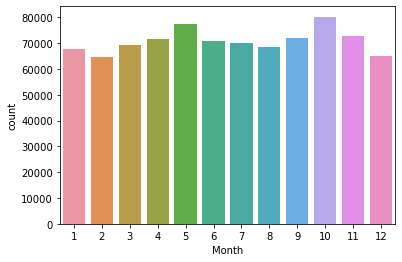

In [17]:
#visualize by month
sns.countplot(df_1["Month"])

Draw a geographical representation of the area


In [51]:
crimedata2 = pd.DataFrame(df["PdDistrict"].value_counts().astype(float))

crimedata2 = crimedata2.reset_index()
crimedata2.columns = ["PdDistrict", "Number"]
crimedata2

,PdDistrict,Number
0,SOUTHERN,157182.0
1,MISSION,119908.0
2,NORTHERN,105296.0
3,BAYVIEW,89431.0
4,CENTRAL,85460.0
5,TENDERLOIN,81809.0
6,INGLESIDE,78845.0
7,TARAVAL,65596.0
8,PARK,49313.0
9,RICHMOND,45209.0


In [52]:
#the different location hava various latitudes and longitudes,
#we need a single point for each. Thus, we find the mean lat and long

grouped= df.groupby(["PdDistrict"])["X", "Y"].mean()
pd.DataFrame(grouped)

C:\Users\Derrick\AppData\Local\Temp/ipykernel_9340/3171116028.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped= df.groupby(["PdDistrict"])["X", "Y"].mean()


,X,Y
PdDistrict,,
BAYVIEW,-122.393359,37.742516
CENTRAL,-122.409507,37.798740
INGLESIDE,-122.428734,37.729195
MISSION,-122.419393,37.760396
NORTHERN,-122.426428,37.792330
PARK,-122.445369,37.772418
RICHMOND,-122.469782,37.788294
SOUTHERN,-122.405185,37.782573
TARAVAL,-122.477214,37.740736


In [53]:
# merge the two smaller data frame
df3= grouped.merge(crimedata2, on ="PdDistrict")
df3.rename (columns= {"X": 'x', "Y": "y"}, inplace= True)
df3

,PdDistrict,x,y,Number
0,BAYVIEW,-122.393359,37.742516,89431.0
1,CENTRAL,-122.409507,37.798740,85460.0
2,INGLESIDE,-122.428734,37.729195,78845.0
3,MISSION,-122.419393,37.760396,119908.0
4,NORTHERN,-122.426428,37.792330,105296.0
5,PARK,-122.445369,37.772418,49313.0
6,RICHMOND,-122.469782,37.788294,45209.0
7,SOUTHERN,-122.405185,37.782573,157182.0
8,TARAVAL,-122.477214,37.740736,65596.0
9,TENDERLOIN,-122.412152,37.793377,81809.0


In [60]:
# to draw a chloropeth map we need a geojson file- with the polygon for the different shapes

#load the file
f= open("Districts.geojson")
geo_jsonData= json.load(f)

#draw
sf_map = fl.Map(location=[37.7749,-122.4194],
                    zoom_start = 12.3,
                    )
#bins = [8699, 12648, 16597, 20546, 24495, 28445]

sf_map.choropleth(
    geo_data=geo_jsonData,
    data = df3,
    columns = ["PdDistrict", "Number"],
    #threshold_scale = bins,
    key_on = 'feature.properties.district',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Francisco Crime Incidents'
)

sf_map

H:\ananconda1\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
# from the map above, the north East part of SanFrancisco has the highest crime rate.

In [18]:
#data frame is still large, let's reduce it 

df_1= df_1.query("Year>= 2011")
df_1.shape

(288722, 14)

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288722 entries, 27584 to 316305
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       288722 non-null  datetime64[ns]
 1   Category    288722 non-null  object        
 2   Descript    288722 non-null  object        
 3   DayOfWeek   288722 non-null  object        
 4   PdDistrict  288722 non-null  object        
 5   Resolution  288722 non-null  object        
 6   Address     288722 non-null  object        
 7   X           288722 non-null  float64       
 8   Y           288722 non-null  float64       
 9   Month       288722 non-null  int64         
 10  Year        288722 non-null  int64         
 11  Day         288722 non-null  int64         
 12  Hour        288722 non-null  int64         
 13  Minute      288722 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 33.0+ MB


In [20]:
#numeric columns
numeric =df_1[["X", "Y","Month", "Year", "Day", "Hour"]]


from sklearn.preprocessing import RobustScaler,StandardScaler, MinMaxScaler

#create object for robust scaler
rs= RobustScaler()
scaled_data = rs.fit_transform(numeric)

scaled_data

array([[-0.70922094, -0.47341   ,  0.83333333,  0.5       ,  0.8       ,
         0.9       ],
       [-0.63546057,  0.7971338 ,  0.83333333,  0.5       ,  0.8       ,
         0.9       ],
       [ 0.13637327,  0.36959528,  0.83333333,  0.5       ,  0.8       ,
         0.9       ],
       ...,
       [-0.03593042,  0.51956819, -1.        , -1.        , -1.        ,
        -1.4       ],
       [-0.14573167,  0.4527222 , -1.        , -1.        , -1.        ,
        -1.4       ],
       [ 1.37693532, -1.31361122, -1.        , -1.        , -1.        ,
        -1.4       ]])

In [21]:
clusters =KMeans(n_clusters= 5, init="k-means++", max_iter =1000)
clusters.fit(scaled_data)

KMeans(max_iter=1000, n_clusters=5)

In [22]:
clusters.labels_

array([1, 1, 1, ..., 0, 0, 3])

In [23]:
dist = clusters.inertia_
dist

457839.0723883903

In [24]:
predicted = clusters.fit_predict(numeric)
predicted

array([3, 3, 3, ..., 1, 1, 1])

In [25]:
predicted is clusters.labels_

True

In [26]:
df_1["Pred_clusters"] = predicted
df_1

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Month,Year,Day,Hour,Minute,Pred_clusters
27584,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Sunday,MISSION,NONE,4100 Block of 18TH ST,-122.435563,37.760801,12,2014,28,23,30,3
27585,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,1900 Block of LOMBARD ST,-122.433575,37.800037,12,2014,28,23,30,3
27586,2014-12-28 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,CENTRAL,NONE,500 Block of GEARY ST,-122.412777,37.786834,12,2014,28,23,30,3
27587,2014-12-28 23:30:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641,12,2014,28,23,30,3
27588,2014-12-28 23:30:00,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641,12,2014,28,23,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316301,2011-01-01 00:01:00,SUSPICIOUS OCC,SUSPICIOUS ACT TOWARDS CHILD,Saturday,INGLESIDE,NONE,400 Block of TRUMBULL ST,-122.422159,37.730975,1,2011,1,0,1,1
316302,2011-01-01 00:01:00,OTHER OFFENSES,HARASSING PHONE CALLS,Saturday,NORTHERN,NONE,800 Block of WEBSTER ST,-122.430095,37.778376,1,2011,1,0,1,1
316303,2011-01-01 00:01:00,NON-CRIMINAL,CASE CLOSURE,Saturday,CENTRAL,EXCEPTIONAL CLEARANCE,1100 Block of HYDE ST,-122.417420,37.791466,1,2011,1,0,1,1
316304,2011-01-01 00:01:00,ASSAULT,THREATS AGAINST LIFE,Saturday,NORTHERN,NONE,1300 Block of POLK ST,-122.420379,37.789401,1,2011,1,0,1,1


In [27]:
#elbow method

wcss = []


for i in range (1, 11):
    clusters = KMeans(n_clusters= i, init ="k-means++", max_iter=1000)
    clusters.fit(scaled_data)
    
    wcss.append(clusters.inertia_)
    


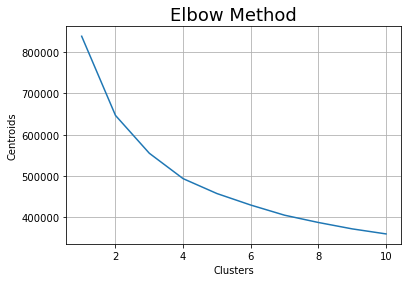

In [28]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method", fontsize= 18)
plt.xlabel("Clusters")
plt.ylabel("Centroids")
plt.grid()
plt.show()

In [29]:
clusters= KMeans(n_clusters=3, init= "k-means++", max_iter=1000)
new_pred=clusters.fit_predict(scaled_data)

In [30]:
df_1["NewClusters"]= new_pred
df_1["NewClusters"].value_counts()

0    178120
2     61453
1     49149
Name: NewClusters, dtype: int64

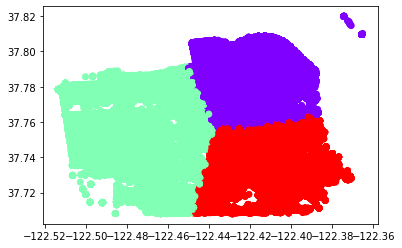

In [31]:
#visualize
plt.scatter(x=df_1["X"], y=df_1["Y"], c=df_1["NewClusters"], cmap="rainbow")

<AxesSubplot:>

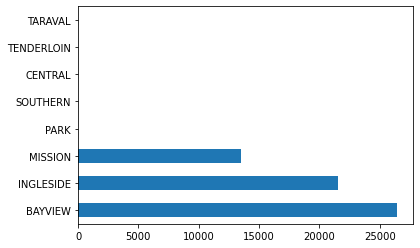

In [42]:
d2 = df_1.query("NewClusters == 2")
#sns.countplot(d2["PdDistrict"], orientation = "horizontal")
counts= d2["PdDistrict"].value_counts()
counts.plot(kind= "barh")

<AxesSubplot:>

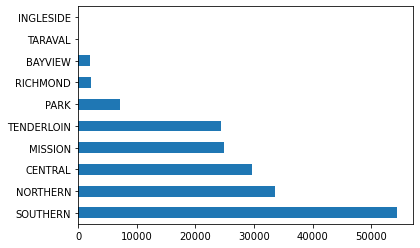

In [48]:
d3= df_1.query("NewClusters == 0")
d3["PdDistrict"].value_counts().plot(kind= "barh")

<AxesSubplot:>

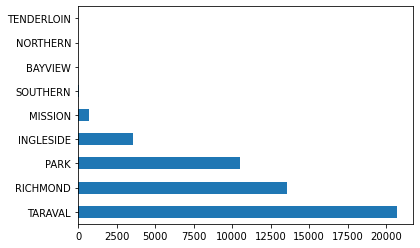

In [49]:
d4= df_1.query("NewClusters == 1")
d4["PdDistrict"].value_counts().plot(kind= "barh")

In [57]:
d4

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Month,Year,Day,Hour,Minute,Pred_clusters,NewClusters
27614,2014-12-28 22:00:00,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Sunday,INGLESIDE,NONE,500 Block of TERESITA BL,-122.446322,37.737960,12,2014,28,22,0,3,1
27625,2014-12-28 21:00:00,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,TARAVAL,NONE,1800 Block of 26TH AV,-122.483839,37.752963,12,2014,28,21,0,3,1
27626,2014-12-28 21:00:00,ASSAULT,THREATS AGAINST LIFE,Sunday,TARAVAL,NONE,1800 Block of 26TH AV,-122.483839,37.752963,12,2014,28,21,0,3,1
27627,2014-12-28 21:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,TARAVAL,NONE,1800 Block of 26TH AV,-122.483839,37.752963,12,2014,28,21,0,3,1
27629,2014-12-28 21:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,PARKER AV / ANZA ST,-122.453878,37.780239,12,2014,28,21,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316286,2011-01-01 00:01:00,FRAUD,"FALSE CLAIMS, PRESENTING TO GOVERNMENT",Saturday,INGLESIDE,UNFOUNDED,500 Block of FLOOD AV,-122.451807,37.729814,1,2011,1,0,1,1,1
316289,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT BICYCLE,Saturday,INGLESIDE,NONE,900 Block of DUNCAN ST,-122.442156,37.745185,1,2011,1,0,1,1,1
316291,2011-01-01 00:01:00,ASSAULT,CHILD ABUSE (PHYSICAL),Saturday,RICHMOND,"ARREST, CITED",600 Block of 25TH AV,-122.484596,37.777213,1,2011,1,0,1,1,1
316296,2011-01-01 00:01:00,OTHER OFFENSES,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,Saturday,TARAVAL,NONE,1300 Block of 19TH AV,-122.477230,37.762603,1,2011,1,0,1,1,1


In [62]:
# try to predict with random values

new_data= [[122.446322,37.737960,5,2018,5,13]]


ppreed= rs.transform(new_data)

pred=clusters.predict(ppreed)

pred

H:\ananconda1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array([2])